<a href="https://colab.research.google.com/github/CarlosZaraza/Cibertec1/blob/main/CasoB_Trabajo_Grupal_Zaraza_%26_Carlos_Ponce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Negocio B: Segmentación de Clientes para una Mejora en el Marketing y la Retención de Clientes

### Objetivo
El objetivo principal es agrupar a los clientes en distintos segmentos basados en su comportamiento de compra, para así poder desarrollar estrategias de marketing más dirigidas, mejorar la retención de clientes, y aumentar la eficiencia en la asignación de recursos.

### Datos Utilizados
Se utilizarán datos del archivo "ventas-por-factura.csv".

### Análisis Propuesto
1. **Análisis Exploratorio de Datos (EDA):** Comprender las tendencias, patrones y anomalías en los datos.
2. **Limpieza y Preprocesamiento de Datos:** Tratar con valores faltantes, codificar variables categóricas y normalizar/escalar los datos.
3. **Selección y Construcción de Características:** Identificar las variables más relevantes que afectan la probabilidad de aprobación de préstamos.

### Desarrollo del Modelo
1. **Elección de Algoritmos**: Utilizar algoritmos de clustering como K-means o DBSCAN

2. **Entrenamiento y Validación del Modelo**: Ajustar el modelo a los datos, determinar el número óptimo de clusters, y validar la consistencia y relevancia de los segmentos de clientes creados siguiendo el concepto de **ANALISIS RFM**

3. **Interpretación de Segmentos**: Encontrar el numero ideal de segmentos mediante el Metodo del Codo. Analizar las características de cada segmento para entender las diferencias clave entre ellos.

### Beneficios Esperados
1. **Mejora en la Efectividad del Marketing**: Al dirigirse a segmentos específicos con mensajes y ofertas personalizadas.

2. **Aumento de la Retención de Clientes**: Al entender y satisfacer mejor las necesidades de diferentes grupos de clientes.

3. **Optimización de Recursos**: Enfocar esfuerzos y recursos en los segmentos más rentables o con mayor potencial.

4. **Mejora de la Satisfacción del Cliente**: Al ofrecer experiencias y productos más relevantes para los distintos grupos de clientes.

5. **Información para Desarrollo de Productos y Servicios**: Los insights obtenidos de los segmentos pueden guiar el desarrollo o mejora de productos y servicios.

## Metadata

- **N° de factura**
- **Fecha de factura**
- **ID Cliente**
- **País**
- **Cantidad** (de productos vendidos)
- **Monto** (de la venta)

#INTEGRANTES DE GRUPO:
#>>Carlos Ponce De León, Fanny Elizabeth
#>>Zaraza Calabe, Carlos Simón

In [ ]:
#### Importar Librerias ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#READING DATA

In [ ]:
#Leemos la DataBase y visualizamos con head
data=pd.read_csv("/content/ventas-por-factura.csv",encoding='unicode_escape')
data.head()

,NÂ° de factura,Fecha de factura,ID Cliente,PaÃ­s,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [ ]:
#Renombramos las columnas para evitar errores en el codigo
data_df=data.rename(columns={'NÂ° de factura':'order_id','Fecha de factura':'order_date', 'ID Cliente':'customer_id', 'PaÃ­s':'country', 'Cantidad':'quantity','Monto':'unit_price'})

In [ ]:
#Visualizamos que los cambios se hayen efectuado correctamente
data_df.head()

,order_id,order_date,customer_id,country,quantity,unit_price
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [ ]:
data_df["order_id"].str.replace("C","")

0        548370
1        575767
2        570727
3        549106
4        573112
          ...  
25948    556518
25949    553060
25950    577049
25951    550122
25952    537999
Name: order_id, Length: 25953, dtype: object

In [ ]:
#Consultamos el tamaño de la data con la que trabajaremos (filas y columnas)
data_df.shape

(25953, 6)

In [ ]:
#Consultamos el tipo de datos que tenemos en nuestra DataBase
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     25953 non-null  object 
 1   order_date   25953 non-null  object 
 2   customer_id  22229 non-null  float64
 3   country      25953 non-null  object 
 4   quantity     25953 non-null  int64  
 5   unit_price   25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
#Cambiamos el tipo de data de acuerdo a nuestras necesidades
data_df['order_date'] = pd.to_datetime(data_df['order_date'], errors='coerce')

In [ ]:
#Comprobamos que se hayan efectuado los cambios en order_date
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     25953 non-null  object        
 1   order_date   25953 non-null  datetime64[ns]
 2   customer_id  22229 non-null  float64       
 3   country      25953 non-null  object        
 4   quantity     25953 non-null  int64         
 5   unit_price   25953 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.2+ MB


#REMOVE UNDESIRED (ILOGICAL) VALUES

In [ ]:
#Eliminamos caracteres no deseados de la columna de unit_price(monto)
data_df['unit_price'] = data_df['unit_price'].apply(lambda x: str(x).replace(',', '.')).astype(float)

In [ ]:
#COMPROBAR SI SE TIENEN VALORES PERDIDOS O FALTANTES (NULL VALUES)
data_df.isna().sum()

order_id          0
order_date        0
customer_id    3724
country           0
quantity          0
unit_price        0
dtype: int64

In [ ]:
#Ver observaciones negativas cantidad y precio
data_df[(data_df.quantity<0) & (data_df.unit_price<0)]

,order_id,order_date,customer_id,country,quantity,unit_price
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45
10,C543628,2021-02-10 15:51:00,16558.0,United Kingdom,-5,-9.25
17,C553508,2021-05-17 13:44:00,14000.0,United Kingdom,-3,-1.95
20,C577693,2021-11-21 11:48:00,12628.0,Germany,-3,-16.85
22,C547309,2021-03-22 11:17:00,17416.0,United Kingdom,-12,-45.00
...,...,...,...,...,...,...
25939,C572450,2021-10-24 12:35:00,NaN,United Kingdom,-2,-278.15
25943,C557061,2021-06-16 14:55:00,14895.0,United Kingdom,-5,-14.75
25944,C562147,2021-08-03 10:47:00,16180.0,United Kingdom,-7,-18.35
25947,C553519,2021-05-17 14:16:00,18218.0,United Kingdom,-2,-9.90


In [ ]:
#Ver observaciones negativas cantidad o precio
data_df[(data_df.quantity<0) | (data_df.unit_price<0)]

,order_id,order_date,customer_id,country,quantity,unit_price
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45
10,C543628,2021-02-10 15:51:00,16558.0,United Kingdom,-5,-9.25
16,542418,2021-01-27 17:39:00,NaN,United Kingdom,-17,0.00
17,C553508,2021-05-17 13:44:00,14000.0,United Kingdom,-3,-1.95
20,C577693,2021-11-21 11:48:00,12628.0,Germany,-3,-16.85
...,...,...,...,...,...,...
25943,C557061,2021-06-16 14:55:00,14895.0,United Kingdom,-5,-14.75
25944,C562147,2021-08-03 10:47:00,16180.0,United Kingdom,-7,-18.35
25947,C553519,2021-05-17 14:16:00,18218.0,United Kingdom,-2,-9.90
25948,C556518,2021-06-13 10:53:00,16794.0,United Kingdom,-2,-12.70


In [ ]:
#Filtramos solo los valores positivos
data_df = data_df[(data_df.quantity>0) & (data_df.unit_price>0)]

In [ ]:
#Consultamos el tamaño de la data con la que trabajaremos (filas y columnas)
data_df.shape

(25953, 6)

In [ ]:
#filtramos datos de "unit_price" que sean menores a 1000 para eliminar el ruido que causan valores muy altos
data_df = data_df.loc[data_df['unit_price'] < 1000]

In [ ]:
#filtramos datos de "quantity" que sean menores a 700 para eliminar el ruido que causan valores muy altos
data_df = data_df.loc[data_df['quantity'] < 700]

In [ ]:
#Consultamos el tamaño de la data con la que trabajaremos despues de filtar datos
data_df.shape

(23813, 6)

In [ ]:
#Analizamos si los valores minimos y maximos de nuestras columnas son razonables y guardan relacion con los cuartiles
data_df.describe()

,customer_id,quantity,unit_price
count,20627.000000,23813.000000,23813.000000
mean,15248.761575,106.385924,186.690593
std,1727.618182,750.501602,1316.124992
min,12346.000000,-80995.000000,-168469.600000
25%,13764.000000,3.000000,1.250000
50%,15152.000000,85.000000,177.890000
75%,16750.000000,198.000000,346.760000
max,18287.000000,699.000000,999.260000


In [ ]:
#Consultamos el tamaño de la data con la que trabajaremos despues de filtar datos
data_df.shape

##FEATURE ENGINEERING TO CLUSTER

CREATING COLUMNS

In [ ]:
#Crear la totalidad de la compra segun la cantidad y precio que gasto en cada compra
data_df['line_price'] = data_df['unit_price'] * data_df['quantity']

In [ ]:
#Filtrar que sean solo valores positivos para evitar errores
data_df = data_df[data_df['line_price'] > 0]
data_df.tail()

**DATE**

In [ ]:
#Verificar la fecha más reciente
max(data_df['order_date'])

Timestamp('2021-12-09 12:50:00')

In [ ]:
#Agregar 1 dia más a la fecha maxima para hacer una resta despues
max(data_df['order_date']) + dt.timedelta(days=1)

Timestamp('2021-12-10 12:50:00')

In [ ]:
#Guardamos en "end_date" el resultado de la suma en días de los valores anteriores para utilizarlo en la ecuación después
end_date = max(data_df['order_date']) + dt.timedelta(days=1)

**AGGREGATED TABLE**

In [ ]:
#Creamos los valores Recency, Frequency y Monetary y los agregamos a la data_rfm
data_df_rfm = data_df.groupby('customer_id').agg(

    recency = ('order_date', lambda x: (end_date - x.max()).days), #fecha final menos el máximo de cada cliente

    frequency = ('order_id', 'count'), #contar cuantas ordenes hizo el cliente

    monetary = ('line_price', 'mean')  #sumar la totalidad de compra de cada cliente
)

#Comprobamos que el codigo se haya efectuado correctamente
data_df_rfm.head()

,recency,frequency,monetary
customer_id,,,
12347.0,2,6,160712.840000
12348.0,75,3,100894.813333
12350.0,310,1,65876.800000
12352.0,36,8,18041.421250
12353.0,204,1,1780.000000


In [ ]:
#Comprobando terminos nulos o vacios
data_df_rfm.isna().sum(axis=0)

recency      0
frequency    0
monetary     0
dtype: int64

#DATA EXPLORATION

In [ ]:
#Visualizar el valor monetario en general en termino promedio
data_df_rfm.monetary.mean()

72098.67553901885

In [ ]:
#Total de clientes unicos
data_df_rfm.shape

(4216, 3)

recency: 


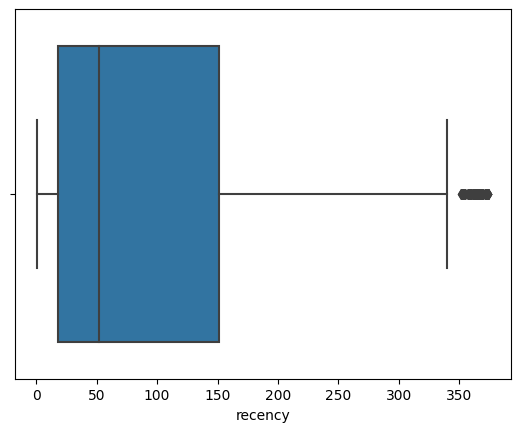

frequency: 


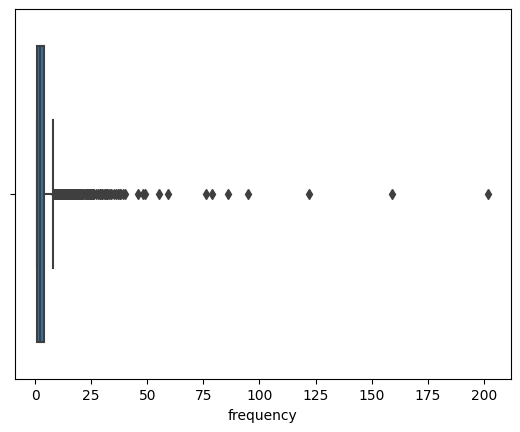

monetary: 


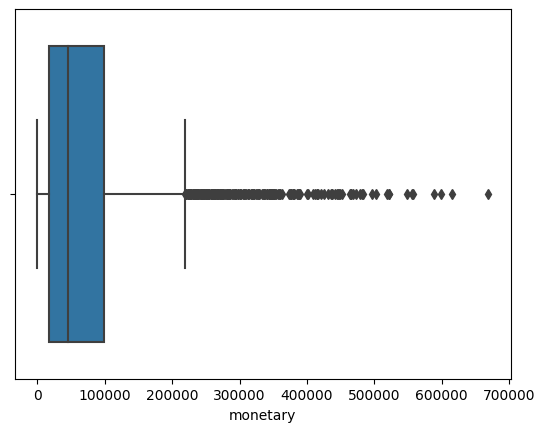

In [ ]:
# visualizar la distribucion de cada columna
for i in data_df_rfm.columns:
  print(str(i)+': ')
  ax = sns.boxplot(x=data_df_rfm[str(i)])
  plt.show()


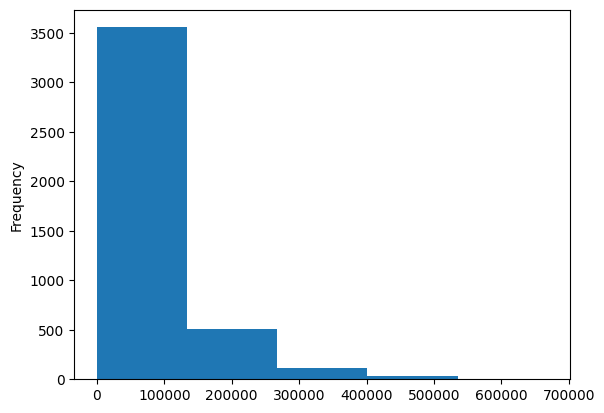

In [ ]:
#frecuencia de transacciones
data_df_rfm.monetary.plot.hist(bins=5)
plt.show()

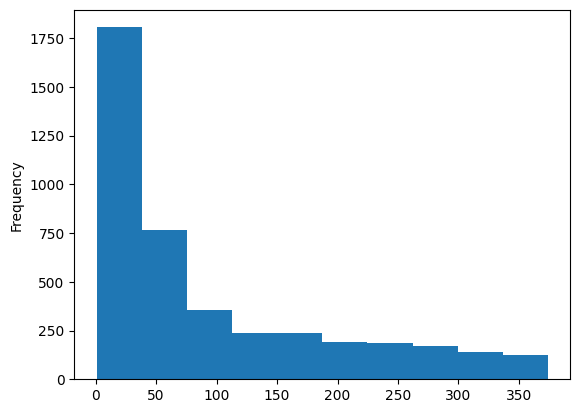

In [ ]:
#mapear donde se encuentra el numero mayoritario de clientes
data_df_rfm.recency.plot.hist(bins=10)
plt.show()

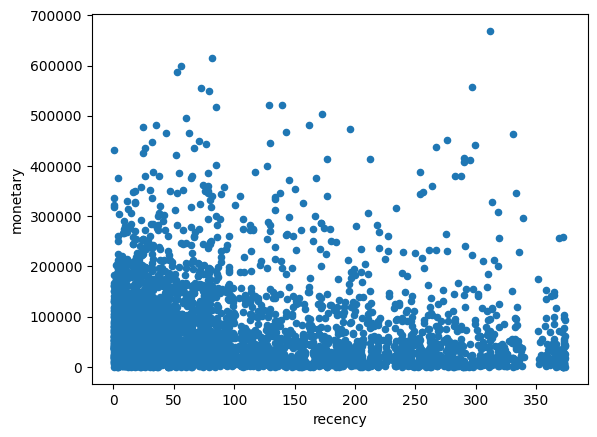

In [ ]:
#Ver la relacion entre cada una de las variables
data_df_rfm.plot("recency","monetary",kind="scatter")
plt.show()

#PREPROCESS THE DATA

In [ ]:
#Preprocesamiento de data para el agrupamiento
data_df_log = np.log1p(data_df_rfm)

In [ ]:
#Estandarización y  transformación de datos
scaler = StandardScaler()

scaler.fit(data_df_log)

data_df_norm = scaler.transform(data_df_log)

In [ ]:
#Normalizamos los valores de las caracteristicas
data_df_norm = pd.DataFrame(data_df_norm, columns=["recency","frequency","monetary"], index=data_df_rfm.index)
data_df_norm.head()

,recency,frequency,monetary
customer_id,,,
12347.0,-2.061680,0.942350,1.051801
12348.0,0.352279,0.097063,0.718141
12350.0,1.404656,-0.949921,0.412612
12352.0,-0.185326,1.321955,-0.515595
12353.0,1.093376,-0.949921,-2.175197


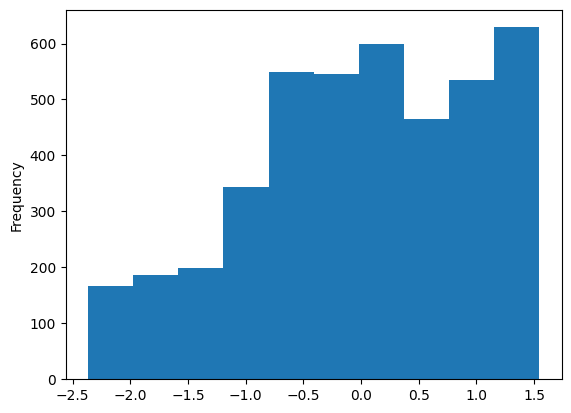

In [ ]:
#Observar el comportamiento de los datos de recency
data_df_norm.recency.plot(kind="hist")
plt.show()

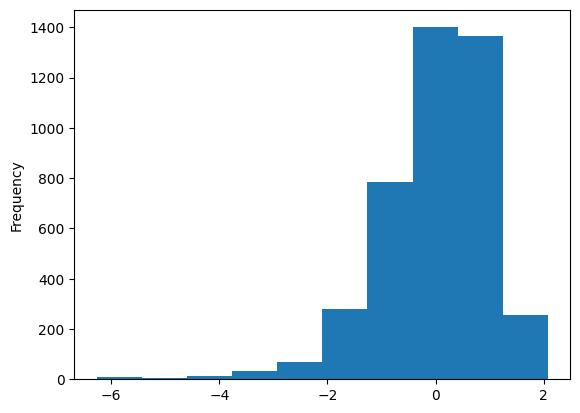

In [ ]:
#Observar el comportamiento de los datos de monetary
data_df_norm.monetary.plot.hist()
plt.show()

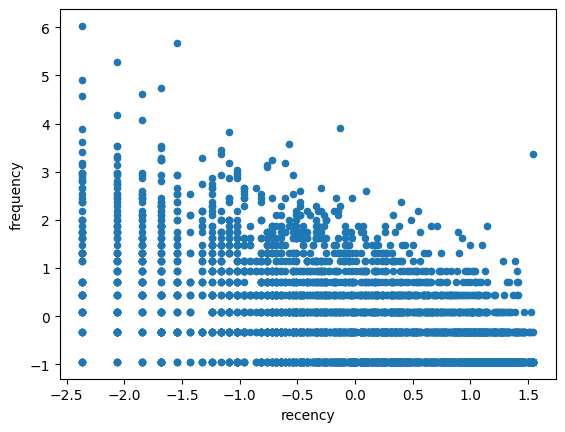

In [ ]:
#Observar el comportamiento de los datos de recency vs frequency y determinar una relación
data_df_norm.plot.scatter("recency","frequency")
plt.show()

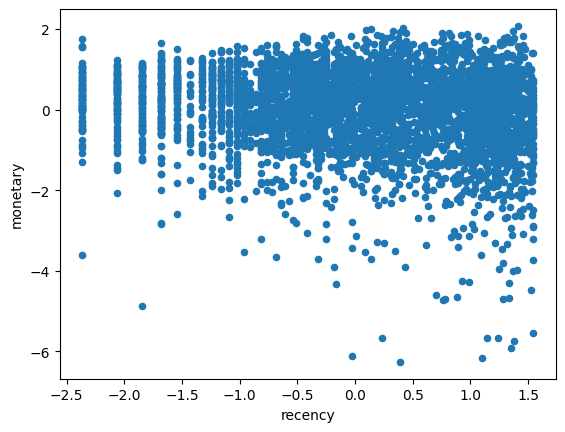

In [ ]:
#Observar el comportamiento de los datos de recency vs monetary y determinar una relación
data_df_norm.plot("recency","monetary",kind="scatter")
plt.show()

#CLUSTERING

ELBOW METHOD

In [ ]:
# Calcular inercia
inercia = []
for k in range (1, 10):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(data_df_norm)
  inercia.append(kmeans.inertia_)

inercia

[17492.79482922204,
 11523.776170164834,
 7551.183754625506,
 5011.021520527616,
 4633.098993055741,
 4271.315459476422,
 4060.5442641415375,
 3539.9511149776667,
 3212.5660522560274]

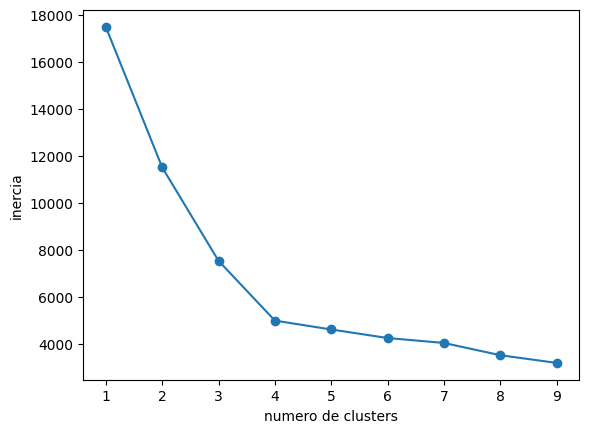

In [ ]:
# Visualizacion
plt.plot(range (1, 10), inercia, marker='o')
plt.xlabel("numero de clusters")
plt.ylabel("inercia")
plt.show() #El metodo del codo indica que 4 es el mejor número de clusters

In [ ]:
#Determinar el numero de clusters segun el analisis de la grafica del Codo de Jambu
kmeans = KMeans(n_clusters=4, random_state=1, n_init="auto")

In [ ]:
#Ajustar los datos normalizados
kmeans.fit(data_df_norm)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [ ]:
#Crear etiquetas segun los clusters
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 754, 1453,  857, 1152]))

In [ ]:
#Otra forma de evaluar los clusters
print(dict(pd.Series(kmeans.labels_).value_counts()))

{1: 1453, 3: 1152, 2: 857, 0: 754}


#ADD CLUSTERS AS DATA LABEL

In [ ]:
#Crear una etiqueta
data_df_norm["cluster"] = kmeans.labels_

In [ ]:
#Convertir cada valor de los grupos a tipo categorico
data_df_norm["cluster"] = data_df_norm["cluster"].astype("category")

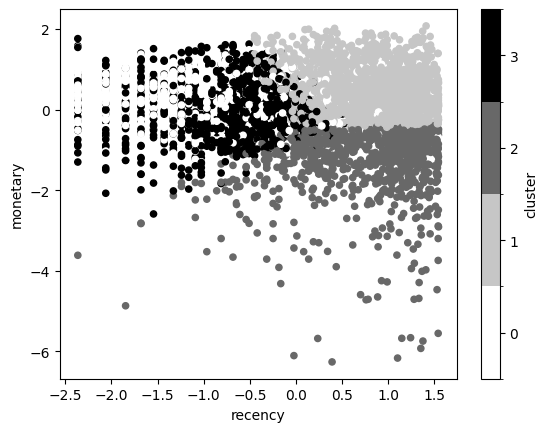

In [ ]:
#Crear un plot de recency vs monetary
data_df_norm.plot(x="recency",y="monetary",c="cluster", kind="scatter")
plt.show()

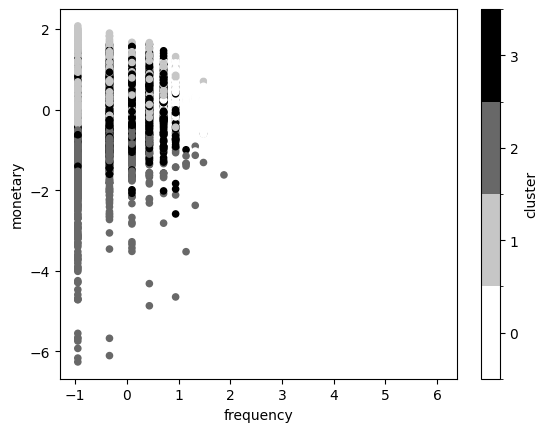

In [ ]:
#Crear un plot de frequency vs monetary
data_df_norm.plot(x="frequency",y="monetary",c="cluster", kind="scatter")
plt.show()

#CLUSTER SEGMENTATION

In [ ]:
#Convertir cada valor a tipo categorico
data_df_rfm["cluster"] = data_df_rfm["cluster"].astype("category")

In [ ]:
#Saca la media de cada columna
data_df_rfm.groupby('cluster').agg(    #Crear una tabla agregada para cada uno de los valores

    recency = ('recency', 'mean'),     #La media del numero de dias de la ultima compra

    frequency = ('frequency', 'mean'), #La media del numero de transacciones

    monetary = ('monetary', 'mean'),   #La media del valor monetario

    cluster_size = ('monetary', 'count')  #Conteo de clientes

).round(1).sort_values(by='recency')   #Que se agrupe en base a recency

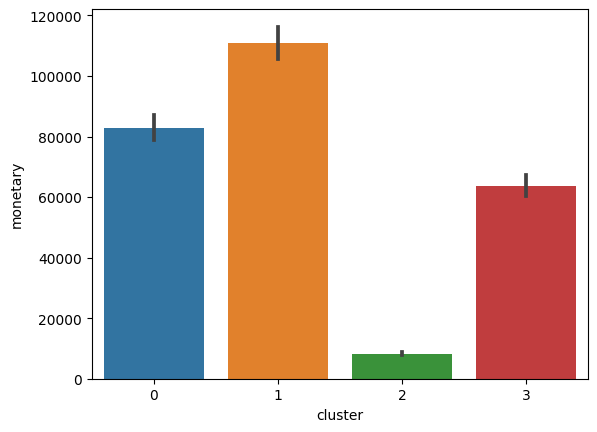

In [ ]:
#Indentificar los mejores grupos en base al valor monetario
sns.barplot(data=data_df_rfm, x="cluster", y="monetary")
plt.show()

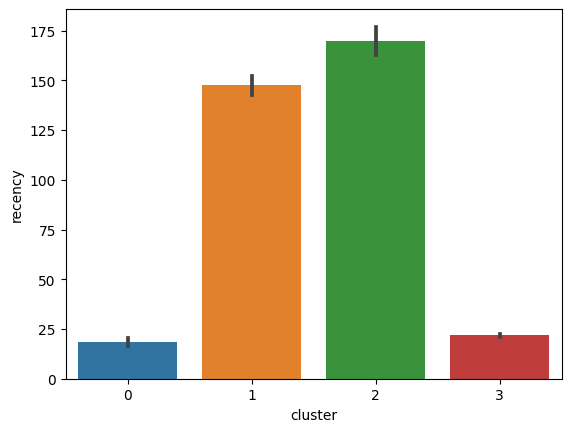

In [ ]:
#Indentificar los mejores grupos en base a su ultima compra
sns.barplot(data=data_df_rfm, x="cluster", y="recency")
plt.show()

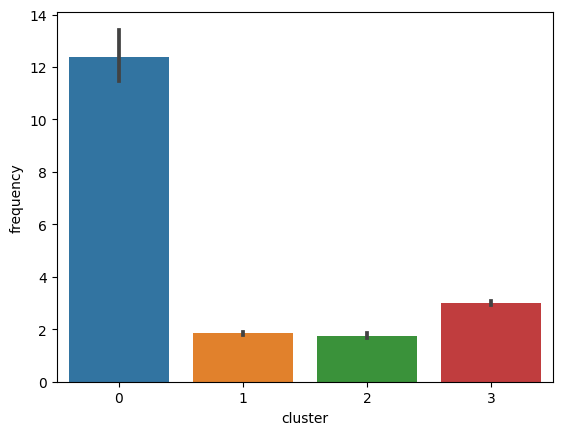

In [ ]:
#Indentificar los mejores grupos en base su frecuencia de compra
sns.barplot(data=data_df_rfm, x="cluster", y="frequency")
plt.show()

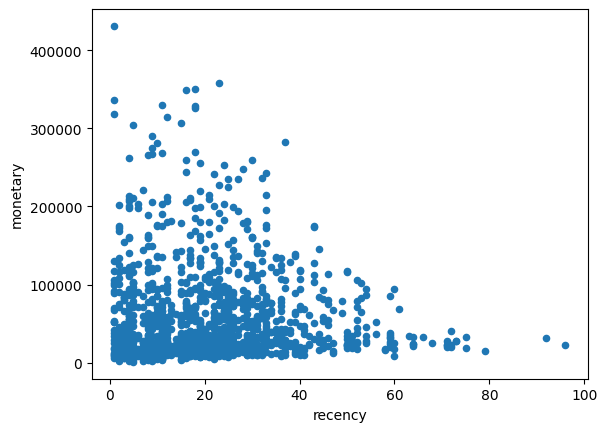

In [ ]:
#Indentificar los mejores grupos en base al valor monetario
data_df_rfm[data_df_rfm.cluster==3].plot(x="recency", y="monetary", kind="scatter")
plt.show()

In [ ]:
data_df_norm

,recency,frequency,monetary,cluster
customer_id,,,,
12347.0,-2.061680,0.942350,1.051801,0
12348.0,0.352279,0.097063,0.718141,1
12350.0,1.404656,-0.949921,0.412612,1
12352.0,-0.185326,1.321955,-0.515595,0
12353.0,1.093376,-0.949921,-2.175197,2
...,...,...,...,...
18280.0,1.323561,-0.949921,-1.087116,2
18281.0,1.004496,-0.949921,-1.532652,2
18282.0,-1.241164,-0.337475,-1.457386,3


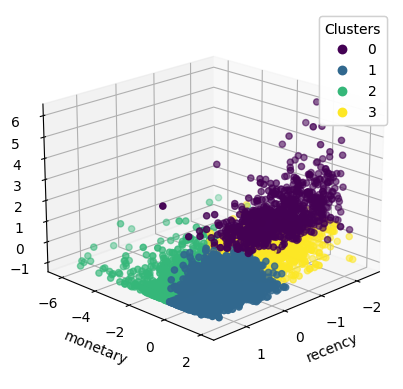

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crea la figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Asigna colores según la columna 'cluster'
colors = data_df_norm['cluster']

# Crea gráfico de dispersión 3D con colores por cluster
scatter = ax.scatter(xs=data_df_norm["recency"], ys=data_df_norm["monetary"], zs=data_df_norm["frequency"], c=colors, marker='o')

# Configura etiquetas de ejes
ax.set_xlabel('recency')
ax.set_ylabel('monetary')
ax.set_zlabel('frequency')

# Configura la vista inicial (ejemplo: elevación 20 grados, azimutal 45 grados)
ax.view_init(elev=20, azim=45)

# Agrega barra de colores (leyenda) para representar los clusters
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()


#INTERPRETATION SEGMENTATION

In [ ]:
#Agregar columna a datos originales
data_df_rfm["cluster"] = kmeans.labels_

In [ ]:
#Adaptar la data
df = pd.DataFrame(data, columns=['order_date'])

In [ ]:
#Calcular que tan similares son los individuos dentro de los clusters
wcss = []

for k in range (1, 11):
  kmeans = KMeans(n_clusters=k, max_iter=300)
  kmeans.fit(data_df_norm)    #Aplicando KMeans a la base de datos
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

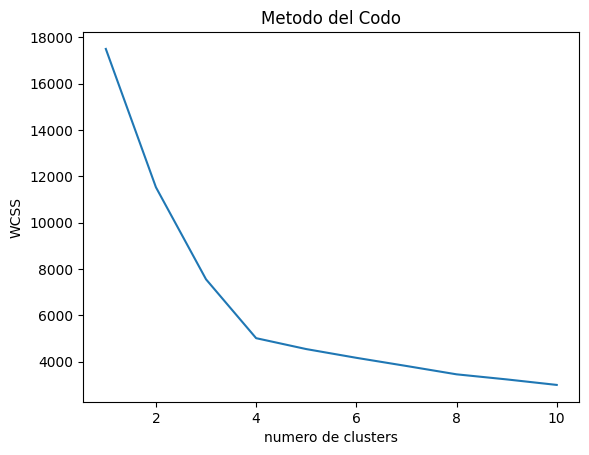

In [ ]:
# Graficando los resultados de WCSS para formar el codo de Jambu
plt.plot(range (1, 11), wcss)
plt.title("Metodo del Codo")
plt.xlabel("numero de clusters")
plt.ylabel("WCSS")  #WCSS es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()